# Basic Numpy

In [1]:
import numpy as np

In [2]:
a = np.array([1,2,3,4])

In [3]:
type(a)

numpy.ndarray

In [4]:
a[1]

2

In [5]:
m = np.array([
    [1,2],
    [3,4]
])

In [6]:
m

array([[1, 2],
       [3, 4]])

In [7]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
np.zeros(10,dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
np.ones(10,dtype=int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
np.full((3,5),100)

array([[100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100]])

In [12]:
np.random.randint(0,10,10)

array([2, 4, 9, 1, 0, 5, 0, 9, 0, 4])

In [13]:
np.random.seed(1)

In [14]:
print(m.shape)

(2, 2)


In [15]:
m = np.array([
    [5,10,15],
    [20,25,30],
    [35,40,45]
])

In [16]:
print(m[:,1])

[10 25 40]


In [17]:
print(m[:,0:2])

[[ 5 10]
 [20 25]
 [35 40]]


In [18]:
v = np.array(['1','2','3'])

In [19]:
v = v.astype(float)

In [20]:
v

array([1., 2., 3.])

In [21]:
v = np.array([5,10,15,20])

In [22]:
v.sum()

50

In [23]:
v.mean()

12.5

In [24]:
index = np.argmax(v)

In [25]:
index

3

In [26]:
index = np.argmin([0,1,2,3])

In [27]:
index

0

In [28]:
x = np.arange(15)
ind = [3,4,5]
print(x[ind])

[3 4 5]


In [29]:
x = np.arange(15)
np.random.shuffle(x)
ind = np.array([[0,2],[1,3]])
print(x)
print(x[ind])

[ 3  7  6  2 10  4  1 13  0 14  9  8 12 11  5]
[[3 6]
 [7 2]]


In [30]:
m1 = np.array([
    [5,10,15],
    [20,25,30],
    [35,40,45]
])

m = (m1 == 25)
print(m)

[[False False False]
 [False  True False]
 [False False False]]


In [31]:
t = (m1[:,1]==25)

In [32]:
t

array([False,  True, False])

In [33]:
v = np.array([5,10,11,12])
e = (v == 5) | (v == 10)
e

array([ True,  True, False, False])

# KNN

In [34]:
import operator
import matplotlib.pyplot as plt

In [35]:
group = np.array([
    [1.0,2.0],
    [1.2,0.1],
    [0.1,1.4],
    [0.3,3.5],
    [1.1,1.0],
    [0.5,1.5]
])
labels = np.array(['A','A','B','B','A','B'])

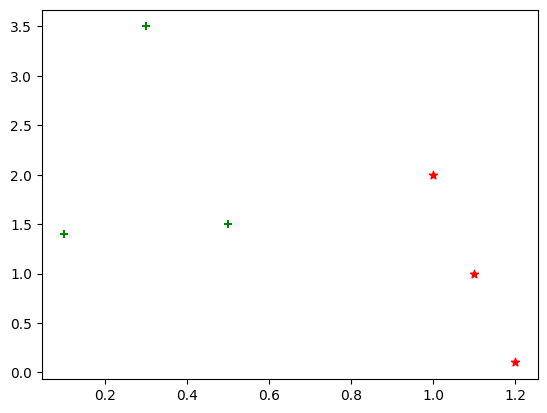

In [36]:
plt.scatter(group[labels=='A',0],group[labels=='A',1],color='r',marker='*')
plt.scatter(group[labels=='B',0],group[labels=='B',1],color='g',marker='+')

In [37]:
def knn(k, dis, X_train, x_train, Y_test):
    num_test = Y_test.shape[0]
    labellist = []
    
    if(dis == 'E'):
        for i in range(num_test):
            distances = np.sqrt(np.sum(((X_train - np.tile(Y_test[i], (X_train.shape[0], 1))) ** 2), axis = 1))
            nearest_k = np.argsort(distances)
            topK = nearest_k[:k]
            classCount = {}
            for i in topK:
                classCount[x_train[i]] = classCount.get(x_train[i],0) + 1
                
            sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1),reverse=True)
            labellist.append(sortedClassCount[0][0])
        return np.array(labellist)

In [38]:
if __name__ == '__main__':
    y_test = knn(1,'E',group, labels, np.array([[1.0,2.1],[0.4,2.0]]))
    print(y_test)

['A' 'B']


In [39]:
x = np.array([1,2,4,6,8])
y = np.array([2,5,7,8,9])
x_mean = np.mean(x)
y_mean = np.mean(y)

denominator = 0.0
numerator = 0.0

for x_i, y_i in zip(x,y):
    numerator += (x_i - x_mean) * (y_i - y_mean)
    denominator += (x_i - x_mean) ** 2

a = numerator / denominator
b = y_mean - a*x_mean

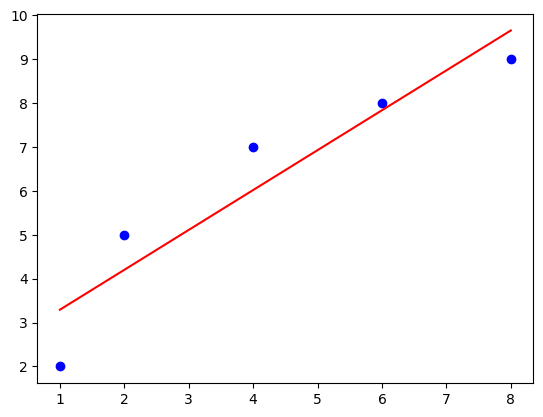

In [40]:
y_predict = a*x+b
plt.scatter(x,y,color='b')
plt.plot(x,y_predict,color='r')

In [41]:
x_test = 7
y_predict_val= a*x_test+b
print(y_predict_val)

8.74390243902439


In [42]:
def fit(self, x_train,y_train):
    assert x_train.ndim == 1
    x_mean = np.mean(x_train)
    y_mean = np.mean(y_train)
    
    denominator =0.0
    numerator = 0.0
    

In [43]:
from numpy import linalg

In [44]:
class MLR:
    def __init__(self):
        self.coef = None
        self.interception = None
        self.theta = None
    
    def fit(self,X_train,y_train):
        assert X_train.shape[0] == y_train.shape[0]
        ones = np.ones((X_train.shape[0],1))
        X_b = np.hstack((ones, X_train))
        self.theta = linalg.inv(X_b.T.dot(X_b)).dot(X-b.T).dot(y_train)
        self.interception = self.theta[0]
        self.coef = self.theta[1:]
        
        return self
    
    def predict(self, X_predict):
        ones = np.ones((X_predict.shape[0],1))
        X_b = np.hstack((ones,X_predict))
        return X_b.dot(self.theta)
    
    
    

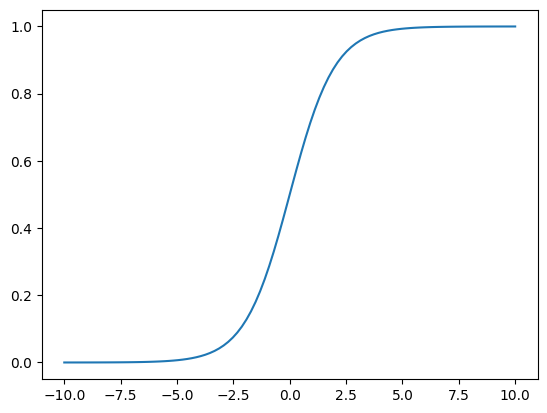

In [45]:
def sigmoid(x):
    y = 1.0 / (1.0+np.exp(-x))
    return y

plot_x = np.linspace(-10,10,100)
plot_y = sigmoid(plot_x)
plt.plot(plot_x, plot_y)
plt.show()